In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.Dataset

In [144]:
file = 'https://raw.githubusercontent.com/diman25pt/Tese/main/Recolha%20e%20tratamento%20da%20base%20de%20dados.csv'

In [145]:
dataset_airbnb=pd.read_csv(file)

In [146]:
dataset_airbnb

Output hidden; open in https://colab.research.google.com to view.

In [147]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      12641 non-null  object 
 1   neighbourhood_cleansed          12641 non-null  object 
 2   latitude                        12641 non-null  float64
 3   longitude                       12641 non-null  float64
 4   room_type                       12641 non-null  object 
 5   accommodates                    12641 non-null  int64  
 6   price                           12641 non-null  float64
 7   minimum_nights                  12641 non-null  int64  
 8   maximum_nights                  12641 non-null  int64  
 9   availability_30                 12641 non-null  int64  
 10  availability_365                12641 non-null  int64  
 11  number_of_reviews               12641 non-null  int64  
 12  number_of_reviews_ltm           

In [148]:
dataset_airbnb['host_since'] = pd.to_datetime(dataset_airbnb['host_since'])
dataset_airbnb['first_review'] = pd.to_datetime(dataset_airbnb['first_review'])
dataset_airbnb['last_review'] = pd.to_datetime(dataset_airbnb['last_review'])

In [149]:
# Calculating the number of days between the first review and the date the data was scraped
dataset_airbnb['time_since_first_review'] = (pd.datetime(2022, 9, 14) - dataset_airbnb.first_review).astype('timedelta64[D]')

# Calculating the number of days between the most recent review and the date the data was scraped
dataset_airbnb['time_since_last_review'] = (pd.datetime(2022, 9, 14) - dataset_airbnb.last_review).astype('timedelta64[D]')

#dataset_airbnb['dias_desde_host'] = (data_do_scraping - dataset_airbnb['host_since']).dt.days
dataset_airbnb['host_days_active'] = (pd.datetime(2022, 9, 14) - dataset_airbnb.host_since).astype('timedelta64[D]')

In [150]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      12641 non-null  datetime64[ns]
 1   neighbourhood_cleansed          12641 non-null  object        
 2   latitude                        12641 non-null  float64       
 3   longitude                       12641 non-null  float64       
 4   room_type                       12641 non-null  object        
 5   accommodates                    12641 non-null  int64         
 6   price                           12641 non-null  float64       
 7   minimum_nights                  12641 non-null  int64         
 8   maximum_nights                  12641 non-null  int64         
 9   availability_30                 12641 non-null  int64         
 10  availability_365                12641 non-null  int64         
 11  nu

# 2. EDA

## 2.1. Numerical variables

### Estatisticas descritivas

In [151]:
# verificando as principais estatísticas numéricas
estatisticas=dataset_airbnb.describe()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(estatisticas)

           latitude     longitude  accommodates         price  minimum_nights  \
count  12641.000000  12641.000000  12641.000000  12641.000000    12641.000000   
mean      38.757870     -9.200687      3.663080    103.142236        3.068824   
std        0.111060      0.108566      1.790005     46.885582        7.013606   
min       38.661270     -9.482900      1.000000     20.000000        1.000000   
25%       38.710680     -9.217850      2.000000     68.000000        1.000000   
50%       38.716780     -9.146490      4.000000     95.000000        2.000000   
75%       38.737300     -9.134200      4.000000    135.000000        3.000000   
max       39.333706     -8.794720     16.000000    220.000000      365.000000   

       maximum_nights  availability_30  availability_365  number_of_reviews  \
count    12641.000000     12641.000000      12641.000000       12641.000000   
mean       655.943122         6.624713        217.910608          63.153706   
std        580.835806         7.4

In [152]:

# Calcule as estatísticas descritivas
estatisticas = dataset_airbnb.describe()

# Aplique formatação personalizada para melhorar a apresentação
estatisticas_styled = estatisticas.style.format("{:.2f}")

# Configure as opções para mostrar todas as linhas e colunas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Exiba as estatísticas descritivas estilizadas
display(estatisticas_styled)

,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,bathrooms,Air conditioning,TV,Extra pillows and blankets,Heating,time_since_first_review,time_since_last_review,host_days_active
count,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00,12641.00
mean,38.76,-9.20,3.66,103.14,3.07,655.94,6.62,217.91,63.15,17.28,1.84,4.64,4.72,16.84,1.64,1.33,0.27,0.83,0.36,0.50,1256.59,101.60,2235.92
std,0.11,0.11,1.79,46.89,7.01,580.84,7.47,119.20,86.71,19.10,2.02,0.40,0.34,43.88,1.50,0.69,0.45,0.37,0.48,0.50,940.20,266.90,1050.58
min,38.66,-9.48,1.00,20.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11.00
25%,38.71,-9.22,2.00,68.00,1.00,90.00,1.00,116.00,8.00,4.00,0.00,4.52,4.63,2.00,0.53,1.00,0.00,1.00,0.00,0.00,336.00,10.00,1518.00
50%,38.72,-9.15,4.00,95.00,2.00,999.00,4.00,258.00,27.00,11.00,1.00,4.75,4.81,4.00,1.21,1.00,0.00,1.00,0.00,0.00,1241.00,19.00,2308.00
75%,38.74,-9.13,4.00,135.00,3.00,1125.00,10.00,322.00,84.00,25.00,3.00,4.89,4.93,13.00,2.35,1.50,1.00,1.00,1.00,1.00,1908.00,41.00,3021.00
max,39.33,-8.79,16.00,220.00,365.00,36180.00,30.00,365.00,1961.00,525.00,23.00,5.00,5.00,292.00,31.16,14.00,1.00,1.00,1.00,1.00,4435.00,2945.00,4538.00


### price

In [153]:
# Calcular a média de preços por região
medias_por_regiao = dataset_airbnb.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Contar o número de imóveis por região
contagem_por_regiao = dataset_airbnb['neighbourhood_cleansed'].value_counts()

# Criar um novo DataFrame com as médias de preços e contagem de imóveis
resumo_por_regiao = pd.DataFrame({
    'Média de Preço': medias_por_regiao,
    'Número de Imóveis': contagem_por_regiao
})

# Classificar o DataFrame pela média de preço em ordem decrescente
resumo_por_regiao = resumo_por_regiao.sort_values(by='Média de Preço', ascending=False)

# Exibir o DataFrame
with pd.option_context('display.float_format', '${:.2f}'.format):
    print(resumo_por_regiao)

                                                   Média de Preço  \
Vermelha                                                  $166.33   
Painho e Figueiros                                        $161.00   
Bucelas                                                   $151.00   
Santa Brbara                                              $133.57   
Turcifal                                                  $130.67   
Dois Portos e Runa                                        $127.75   
Maxial e Monte Redondo                                    $124.20   
Alhandra, So Joo dos Montes e Calhandriz                  $123.33   
Ribamar                                                   $121.33   
Parque das Naes                                           $120.14   
Pvoa de Santa Iria e Forte da Casa                        $118.50   
Cascais e Estoril                                         $117.30   
Alenquer (Santo Estvo e Triana)                           $116.75   
Mafra                             

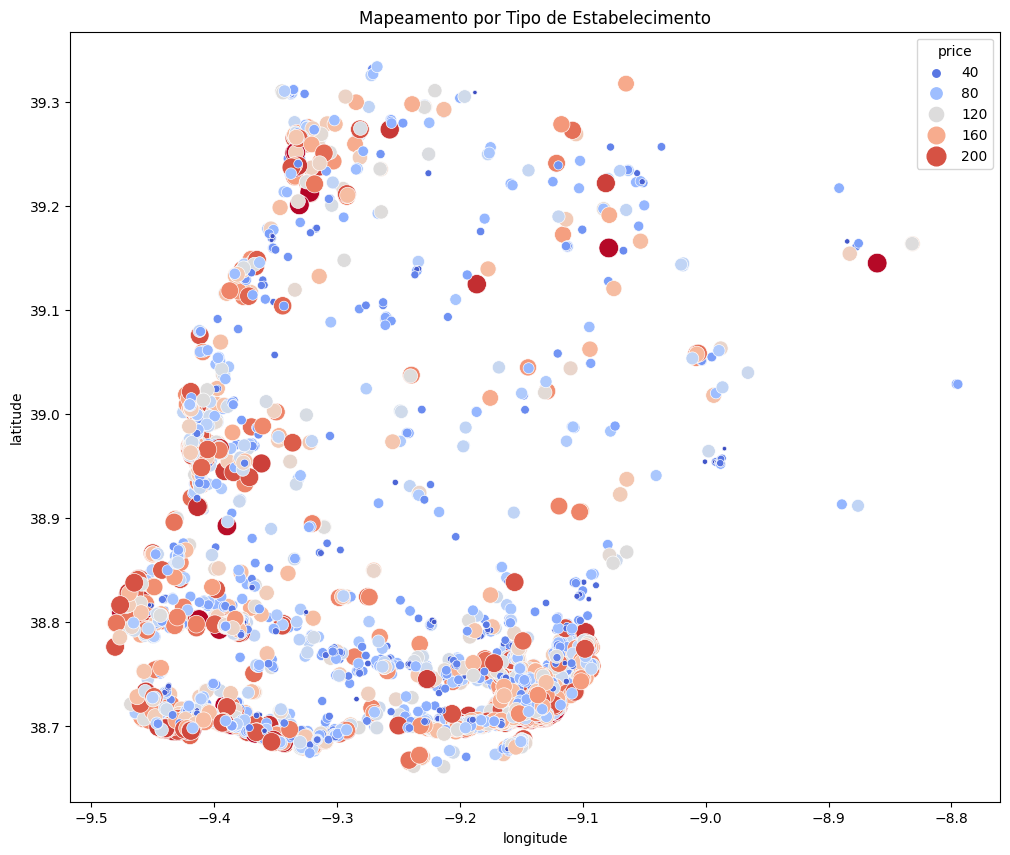

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o tamanho da figura
plt.figure(figsize=(12, 10))

# Escolha uma paleta de cores personalizada
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Crie um gráfico de dispersão com tamanho de ponto variável com base no preço
scatter = sns.scatterplot(data=dataset_airbnb, x="longitude", y="latitude", hue="price", palette=custom_palette, size="price", sizes=(10, 200))

# Defina um título para o gráfico
scatter.set_title('Mapeamento por Tipo de Estabelecimento')

# Exiba o gráfico
plt.show()

In [155]:
px.density_mapbox (dataset_airbnb, lat = "latitude", lon = "longitude", z = "price", radius = 2.5, center = {"lat": dataset_airbnb.latitude.mean (), "lon": dataset_airbnb.longitude.mean ()}, zoom = 10, mapbox_style = "stamen-terrain").show ()

In [156]:
print(f'A média geral de preços é: €{dataset_airbnb.price.mean():.2f}')

A média geral de preços é: €103.14


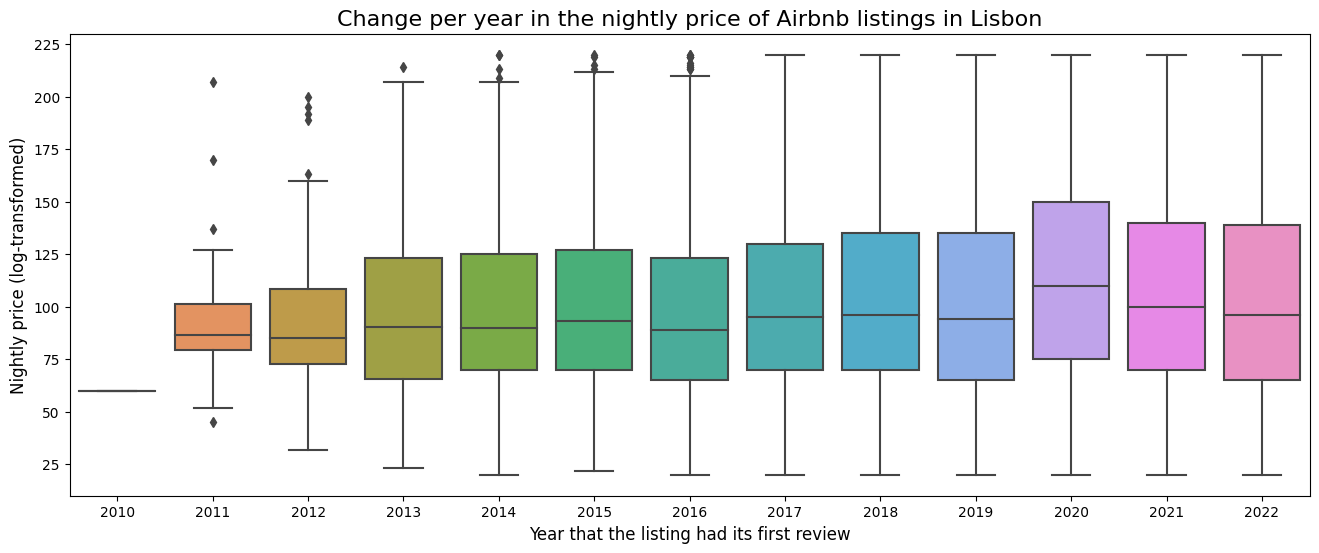

In [157]:
# Crie um novo DataFrame com as colunas de interesse
data_to_plot = pd.DataFrame({
    'Year of First Review': dataset_airbnb.first_review.dt.year,
    'Price': (dataset_airbnb.price)
})

# Crie o boxplot usando o novo DataFrame
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_to_plot, x='Year of First Review', y='Price')
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Lisbon', fontsize=16)
plt.show()

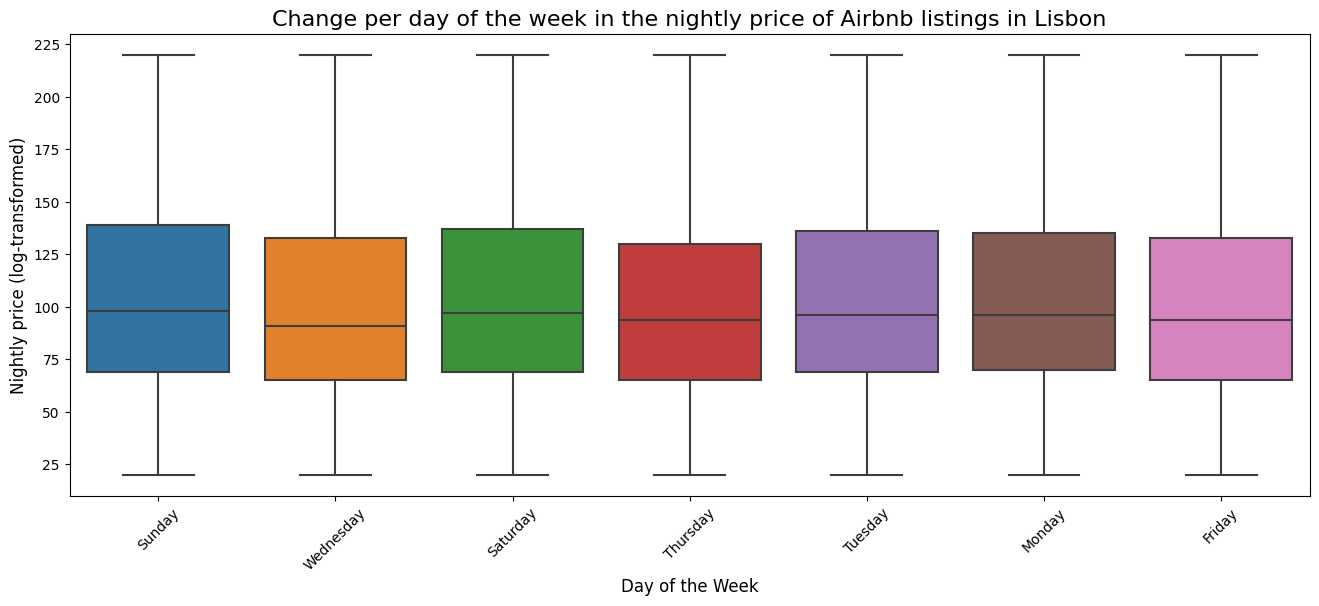

In [158]:
# Crie um novo DataFrame com as colunas de interesse
data_to_plot = pd.DataFrame({
    'Day of the Week': dataset_airbnb.first_review.dt.day_name(),
    'Price': (dataset_airbnb.price)
})

# Crie o boxplot usando o novo DataFrame
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_to_plot, x='Day of the Week', y='Price')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per day of the week in the nightly price of Airbnb listings in Lisbon', fontsize=16)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

As we can see, Fridays and Saturdays are more expensive compared to the other days of the weeks, perhaps due to higher demand for lodging.

In [159]:
print("Mean nightly price of listings in each year on Airbnb in Lisbon:")
print(round(dataset_airbnb.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Lisbon:
first_review
2010-01-01     60.00
2011-01-01     95.25
2012-01-01     94.08
2013-01-01     97.84
2014-01-01     98.90
2015-01-01    101.12
2016-01-01     97.15
2017-01-01    102.86
2018-01-01    103.59
2019-01-01    102.05
2020-01-01    114.42
2021-01-01    107.09
2022-01-01    102.85
Freq: AS-JAN, Name: price, dtype: float64


In term of changes in prices over time, the average price per night for Airbnb listings in Lisbon has increased  over the last 10 years. In particular, the top end of property prices has increased, resulting in a larger increase in the mean price compared to the median. The mean and the median price in 2010 was 50€  , whereas the mean price in 2021 (the last complete year of data) was 95.47€ and the median 72.0€.

### Accommodates


The median number of listings that the host of each listing has is 3. This means that on average (median) each listing is hosted by a host who only manages that listing. The mean is higher (20.740734) due to some hosts managing some (very) large numbers of listings, as discussed below in the Time Series section. For example, the host with the highest number of listings has 2249.000000 listings under its ID. About 21% of listings are from hosts with one listing.

Two difficulties in discerning how many listings hosts have on average are:

* 1.this number is only known on the level of the listing, so hosts with more listings are represented more frequently (e.g a host with 10 listings may be represented up to 10 times in the dataset)

* 2.a host's other listings may not be in Lisbon, so some multi-listing hosts may appear multiple times in the dataset, and others may appear only once

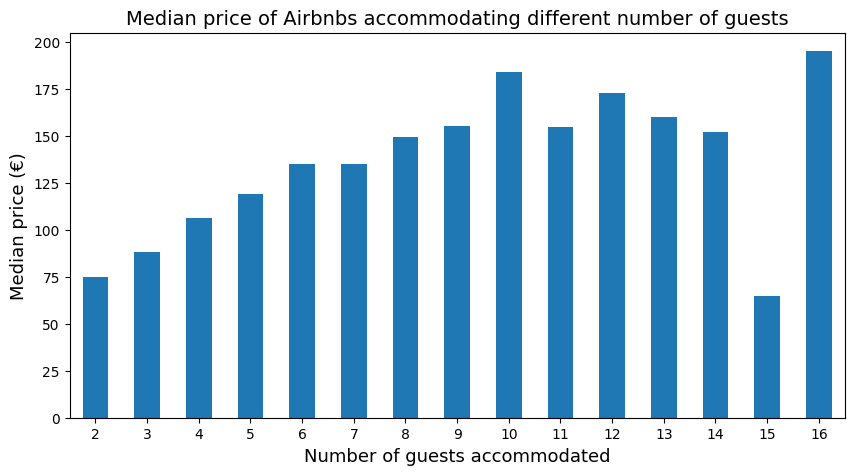

In [160]:
plt.figure(figsize=(10,5))
dataset_airbnb.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

## 2.2. Categorical variables

In [161]:
# verificando as principais estatísticas categóricas
dataset_airbnb.describe(include='O')

,neighbourhood_cleansed,room_type
count,12641,12641
unique,117,4
top,Santa Maria Maior,Entire home/apt
freq,2144,9682


### property_type and room_type

About 68% of properties are houses. The remainder are apartments or more uncommon property types (e.g. bed and breakfast).

About 79% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

Entire home/apt    0.765920
Private room       0.215727
Shared room        0.009651
Hotel room         0.008702
Name: room_type, dtype: float64

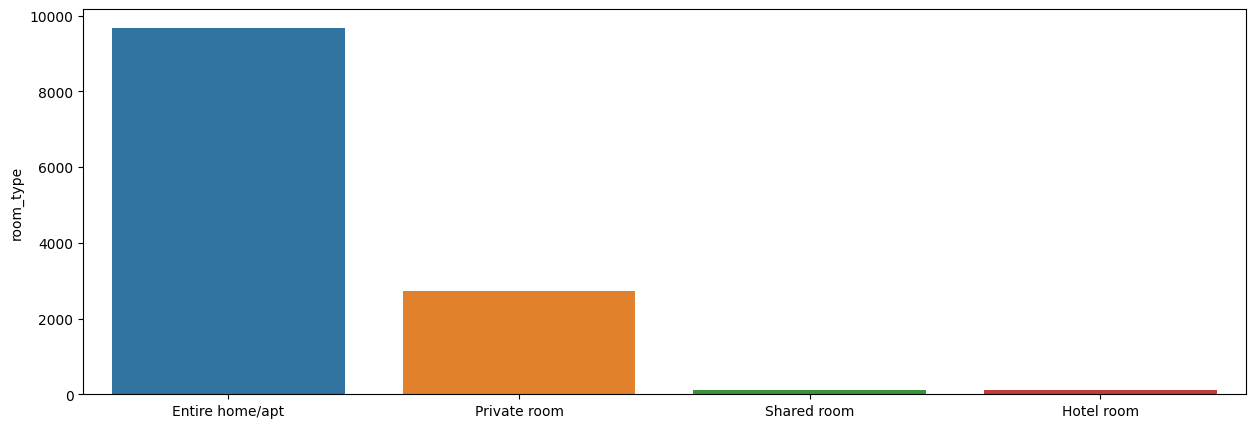

In [162]:
def outlier (col):
    q1 = col.quantile (0.25)
    q3 = col.quantile (0.75)
    iqr = q3 - q1
    lenght = 1.5
    return q1 - lenght * iqr, q3 + lenght * iqr

def box (col):
    fig, (ax1, ax2) = plt.subplots (1, 2)
    fig.set_size_inches (15, 5)
    sns.boxplot (x = col, ax = ax1)
    ax2.set_xlim (outlier (col))
    sns.boxplot (x = col, ax = ax2)

def hist (col):
    plt.figure (figsize = (15,5))
    sns.histplot (col, kde = True)

def bar (col):
    plt.figure (figsize = (15,5))
    ax = sns.barplot (x = col.value_counts ().index, y = col.value_counts ())
    if col.dtypes != "object":
        ax.set_xlim (outlier (col))

bar (dataset_airbnb ["room_type"])
#box (dataset_airbnb ["price"])
#hist (dataset_airbnb ["price"])
dataset_airbnb ["room_type"].value_counts (normalize = True)

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_histogram(dataset_airbnb, colname, figscale=1, mpl_palette_name='Dark2'):
  plt.figure(figsize=(8*figscale, 4.8*figscale))
  ax = dataset_airbnb.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.gca().spines[['top', 'right',]].set_visible(False)

  # Adicionar valores nas barras
  for i, v in enumerate(dataset_airbnb.groupby(colname).size()):
      ax.text(v + 1, i, str(v), va='center', color='black', fontsize=12, fontweight='bold')

  plt.show()

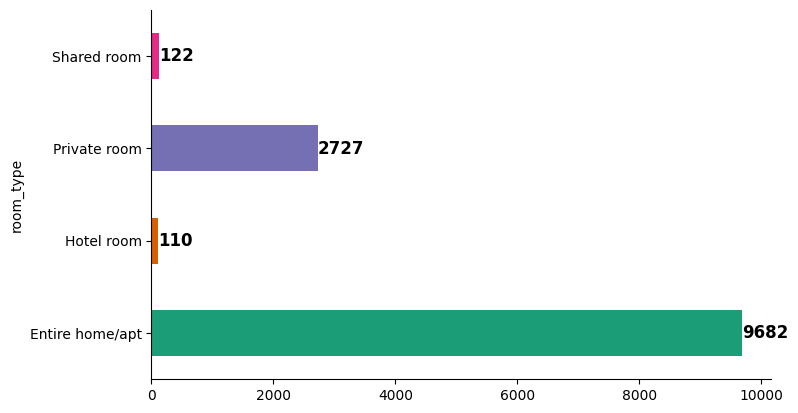

In [164]:
categorical_histogram(dataset_airbnb, 'room_type')

In [165]:
# agrupando por tipo mais alugados
dataset_airbnb.groupby('room_type').agg({'room_type': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False)

,room_type,price
room_type,,
Entire home/apt,9682,114.907870
Hotel room,110,113.118182
Private room,2727,63.839017
Shared room,122,38.942623


A concentração dos tipos mais alugados são de entire home/apartments e quartos inteiros, os quartos partilhados são os menos procurados.

### first_review` and `last_review `

first_review

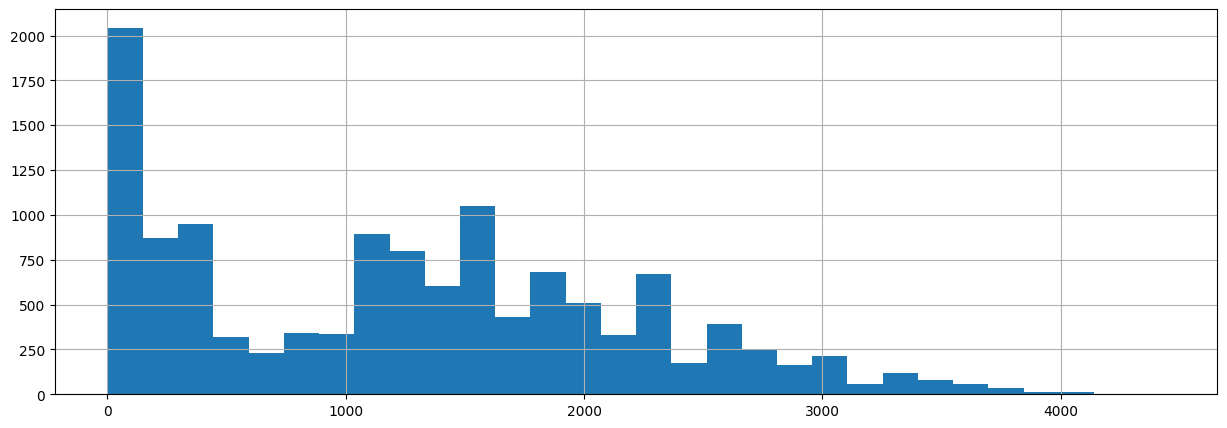

In [166]:
# Distribution of the number of days since first review
dataset_airbnb.time_since_first_review.hist(figsize=(15,5), bins=30);

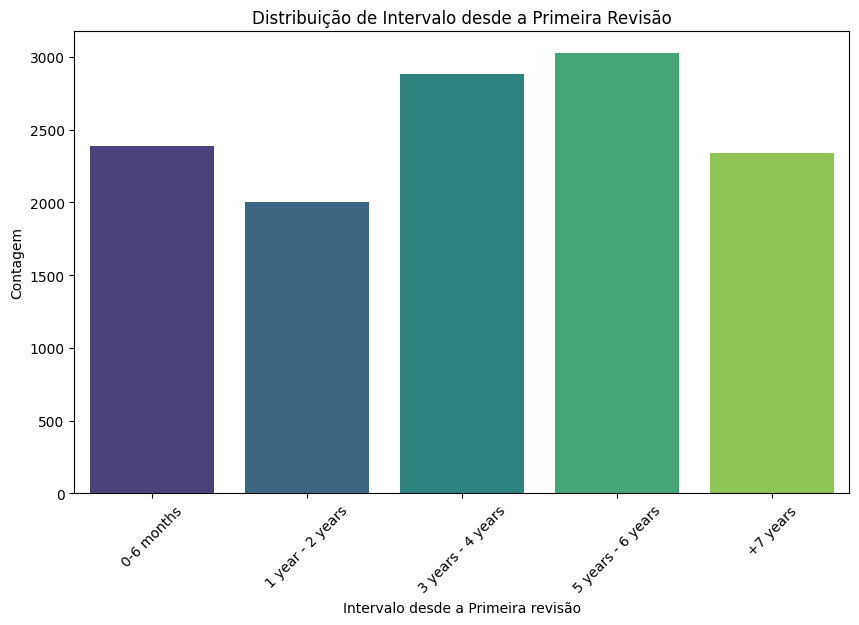

In [167]:
# Defina os intervalos desejados
bins = [-1, 182, 730, 1460, 2190, dataset_airbnb['time_since_first_review'].max()]

# Defina os rótulos para os intervalos
labels = ['0-6 months', '1 year - 2 years', '3 years - 4 years', '5 years - 6 years', '+7 years']

# Crie uma nova coluna 'first_review_interval' com os intervalos
dataset_airbnb['first_review_interval'] = pd.cut(dataset_airbnb['time_since_first_review'], bins=bins, labels=labels)

# Calcule as contagens em cada intervalo
interval_counts = dataset_airbnb['first_review_interval'].value_counts()

# Crie um gráfico de barras para a contagem de revisões em cada intervalo
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_airbnb, x='first_review_interval', palette='viridis')

# Adicione rótulos aos eixos x e y
plt.xlabel('Intervalo desde a Primeira revisão')
plt.ylabel('Contagem')
plt.title('Distribuição de Intervalo desde a Primeira Revisão')

# Rotacione os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

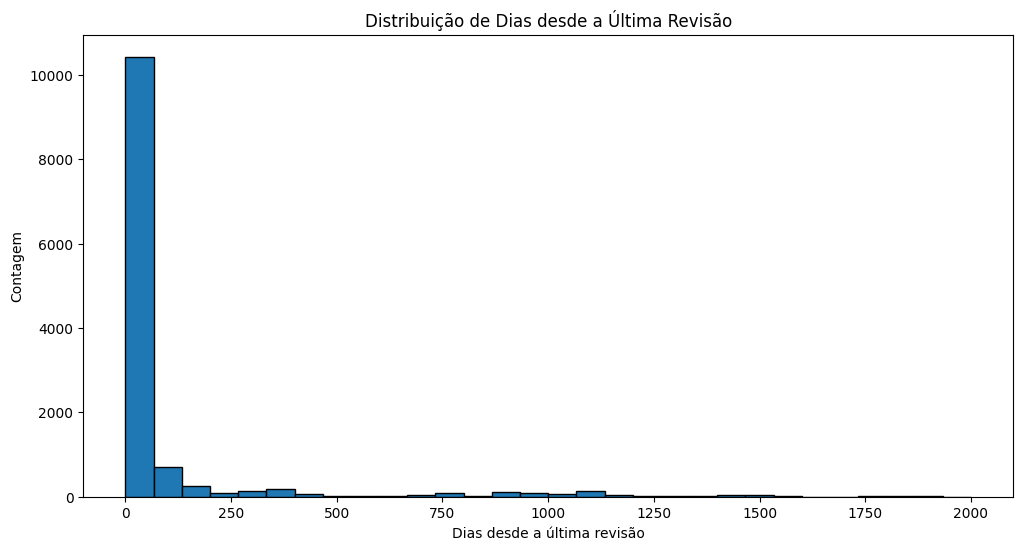

In [168]:
import matplotlib.pyplot as plt

# Defina os limites do eixo x e o número de bins
x_min = 0  # Limite mínimo do eixo x
x_max = 2000 # Limite máximo do eixo x (por exemplo, 1 ano)
num_bins = 30  # Número de bins

# Crie o histograma com os limites personalizados e o número de bins
plt.figure(figsize=(12, 6))
plt.hist(dataset_airbnb['time_since_last_review'], bins=num_bins, range=(x_min, x_max), edgecolor='k')

# Defina os rótulos do eixo x e y
plt.xlabel('Dias desde a última revisão')
plt.ylabel('Contagem')

# Defina o título do gráfico
plt.title('Distribuição de Dias desde a Última Revisão')

# Mostre o gráfico
plt.show()

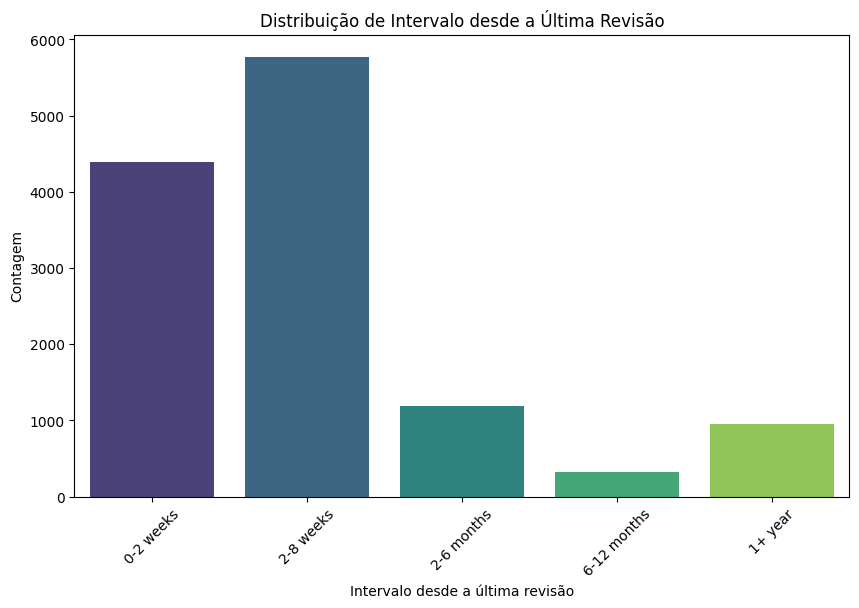

In [169]:

# Defina os intervalos desejados
bins = [-1, 14, 56, 182, 365, dataset_airbnb['time_since_last_review'].max()]

# Defina os rótulos para os intervalos
labels = ['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1+ year']

# Crie uma nova coluna 'last_review_interval' com os intervalos
dataset_airbnb['last_review_interval'] = pd.cut(dataset_airbnb['time_since_last_review'], bins=bins, labels=labels)

# Calcule as contagens em cada intervalo
interval_counts = dataset_airbnb['last_review_interval'].value_counts()

# Crie um gráfico de barras para a contagem de revisões em cada intervalo
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_airbnb, x='last_review_interval', palette='viridis')

# Adicione rótulos aos eixos x e y
plt.xlabel('Intervalo desde a última revisão')
plt.ylabel('Contagem')
plt.title('Distribuição de Intervalo desde a Última Revisão')

# Rotacione os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

In [170]:
dataset_airbnb.dtypes

host_since                        datetime64[ns]
neighbourhood_cleansed                    object
latitude                                 float64
longitude                                float64
room_type                                 object
accommodates                               int64
price                                    float64
minimum_nights                             int64
maximum_nights                             int64
availability_30                            int64
availability_365                           int64
number_of_reviews                          int64
number_of_reviews_ltm                      int64
number_of_reviews_l30d                     int64
first_review                      datetime64[ns]
last_review                       datetime64[ns]
review_scores_rating                     float64
review_scores_location                   float64
calculated_host_listings_count             int64
reviews_per_month                        float64
bathrooms           

## 2.3. Understading the data

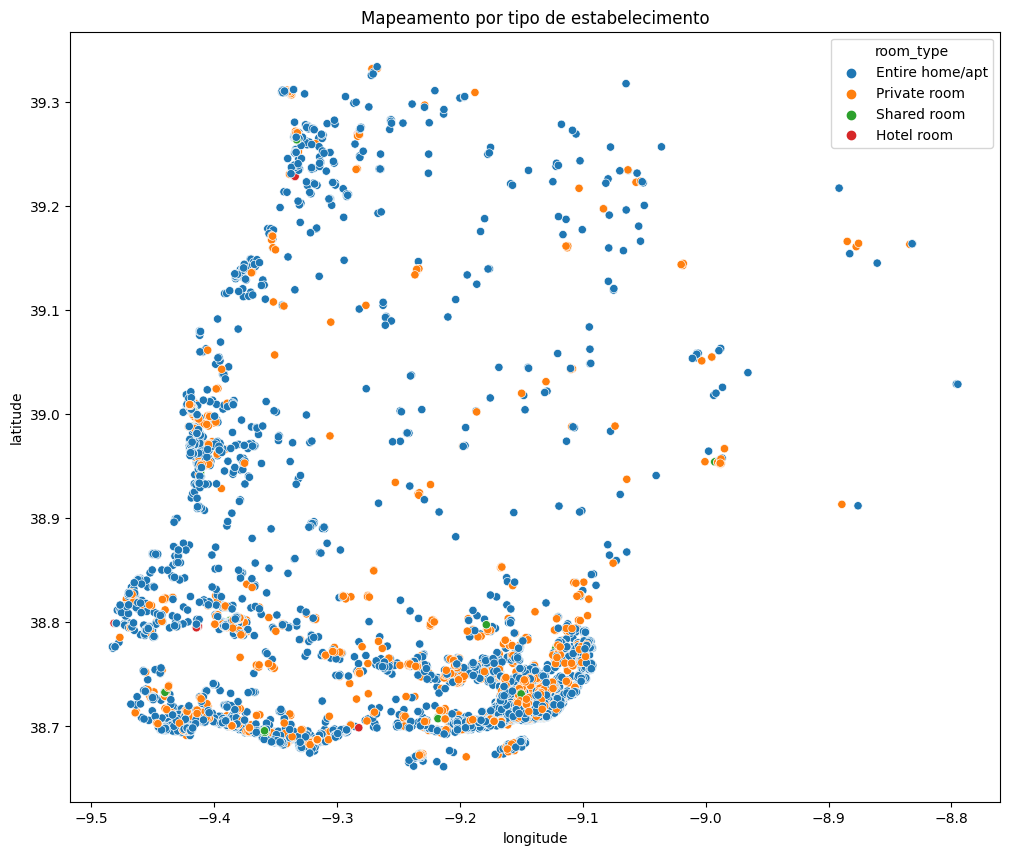

In [171]:
# definindo a área de plotagem
fig, ax = plt.subplots(figsize = (12,10))

# plotando o gráfico
ax = sns.scatterplot(data=dataset_airbnb, y="latitude", x="longitude", hue='room_type')
ax.set_title('Mapeamento por tipo de estabelecimento')
plt.show()

In [172]:
import folium
from folium.plugins import MarkerCluster

# Criar um mapa centrado em Lisboa
lisbon_map = folium.Map(location=[38.7223, -9.1393], zoom_start=12)

# Criar clusters de marcadores para diferentes tipos de estabelecimento
private_rooms = MarkerCluster(name='Private Rooms').add_to(lisbon_map)
shared_rooms = MarkerCluster(name='Shared Rooms').add_to(lisbon_map)
entire_homes = MarkerCluster(name='Entire Homes/Apartments').add_to(lisbon_map)
hotel_rooms = MarkerCluster(name='Hotel Rooms').add_to(lisbon_map)  # Novo cluster para quartos de hotel

# Função para formatar o pop-up HTML
def format_popup(room_type, price, rating):
    popup_html = f"""
    <div style="text-align: center;">
        <h4>{room_type}</h4>
        <p>Price: {price} €</p>
        <p>Rating: {rating} / 5</p>
    </div>
    """
    return folium.Popup(popup_html, max_width=200)

# Adicionar marcadores para cada tipo de estabelecimento com informações detalhadas
for _, row in dataset_airbnb.iterrows():
    if row['room_type'] == 'Private room':
        popup = format_popup("Private Room", row['price'], row['review_scores_rating'])
        folium.Marker([row['latitude'], row['longitude']], icon=None, popup=popup).add_to(private_rooms)
    elif row['room_type'] == 'Shared room':
        popup = format_popup("Shared Room", row['price'], row['review_scores_rating'])
        folium.Marker([row['latitude'], row['longitude']], icon=None, popup=popup).add_to(shared_rooms)
    elif row['room_type'] == 'Entire home/apt':
        popup = format_popup("Entire Home/Apt", row['price'], row['review_scores_rating'])
        folium.Marker([row['latitude'], row['longitude']], icon=None, popup=popup).add_to(entire_homes)
    elif row['room_type'] == 'Hotel room':  # Novo bloco para quartos de hotel
        popup = format_popup("Hotel Room", row['price'], row['review_scores_rating'])
        folium.Marker([row['latitude'], row['longitude']], icon=None, popup=popup).add_to(hotel_rooms)

#lisbon_map.get_root().html.add_child(folium.Element(legend_html))

# Exibir o mapa
lisbon_map

Output hidden; open in https://colab.research.google.com to view.

In [173]:
import folium
from folium.plugins import HeatMap

# Criar um mapa centrado em Lisboa
lisbon_map = folium.Map(location=[38.7223, -9.1393], zoom_start=12)

# Criar um DataFrame com as coordenadas das listagens do Airbnb
locations = dataset_airbnb[['latitude', 'longitude', 'room_type']]

# Remover linhas com coordenadas ausentes
locations = locations.dropna()

# Filtrar por tipo de estabelecimento
room_types = ['Private room', 'Shared room', 'Entire home/apt', 'Hotel room']
heatmaps = {}

# Criar mapas de calor para cada tipo de quarto
for room_type in room_types:
    room_coords = locations[locations['room_type'] == room_type][['latitude', 'longitude']].values.tolist()
    heatmaps[room_type] = HeatMap(room_coords, name=room_type, radius=10).add_to(lisbon_map)

# Adicionar um controle de camadas (layers control) ao mapa
folium.LayerControl(collapsed=False).add_to(lisbon_map)

# Exibir o mapa
lisbon_map



## Preparar para a modelação

In [174]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      12641 non-null  datetime64[ns]
 1   neighbourhood_cleansed          12641 non-null  object        
 2   latitude                        12641 non-null  float64       
 3   longitude                       12641 non-null  float64       
 4   room_type                       12641 non-null  object        
 5   accommodates                    12641 non-null  int64         
 6   price                           12641 non-null  float64       
 7   minimum_nights                  12641 non-null  int64         
 8   maximum_nights                  12641 non-null  int64         
 9   availability_30                 12641 non-null  int64         
 10  availability_365                12641 non-null  int64         
 11  nu

Vamos remover tudo o que não seja numérico e tornar o room_type em binárias

In [175]:
dataset_airbnb.drop(columns=['first_review_interval', 'last_review_interval', 'first_review', 'last_review', 'neighbourhood_cleansed', 'host_since'],inplace=True)

In [176]:
# Aplicar codificação one-hot à coluna 'room_type'
room_type_dummies = pd.get_dummies(dataset_airbnb['room_type'], prefix='room_type')

# Concatenar as variáveis dummy com o DataFrame original
dataset_airbnb = pd.concat([dataset_airbnb, room_type_dummies], axis=1)

# Fazer drop da coluna 'room_type'
dataset_airbnb.drop(columns=['room_type'], inplace=True)

# Exibir informações sobre o DataFrame
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        12641 non-null  float64
 1   longitude                       12641 non-null  float64
 2   accommodates                    12641 non-null  int64  
 3   price                           12641 non-null  float64
 4   minimum_nights                  12641 non-null  int64  
 5   maximum_nights                  12641 non-null  int64  
 6   availability_30                 12641 non-null  int64  
 7   availability_365                12641 non-null  int64  
 8   number_of_reviews               12641 non-null  int64  
 9   number_of_reviews_ltm           12641 non-null  int64  
 10  number_of_reviews_l30d          12641 non-null  int64  
 11  review_scores_rating            12641 non-null  float64
 12  review_scores_location          

In [177]:
dataset_airbnb.shape

(12641, 27)

In [178]:
# Resetting the index as we deleted some rows
dataset_airbnb.reset_index(drop=True, inplace=True)

In [179]:
dataset_airbnb.to_csv('Análise exploratéria de dados.csv', index=False)

In [181]:
# Para criar um link de download para o arquivo CSV
from google.colab import files

files.download('Análise exploratéria de dados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>